In [1]:
from dataloader import Dataloader
from torchvision.transforms import ToPILImage
from model import Model
import torch
import torch.optim as optim

/home/brage/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
results = Dataloader().load_image(0)

In [3]:
import matplotlib.pyplot as plt

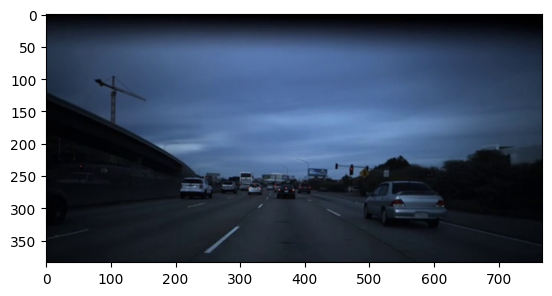

In [16]:
plt.imshow(
    ToPILImage()(results["first_image"] * 255)
)

In [5]:
model = Model()
adam = optim.Adam(model.parameters())

In [6]:
import loss
import importlib
importlib.reload(loss)

loss = loss.loss

In [7]:
### Training cycle

In [8]:
for i in range(100):
    results = Dataloader().load_image(i)
    loss_output = model.forward_apply(
        results["first_image"].reshape((1, ) + results["first_image"].shape).float(),
        results["second_image"].reshape((1, ) + results["second_image"].shape).float()
    )

    model.zero_grad()
    error = loss(
        loss_output["left_input"],
        loss_output["left_reconstructed"],
        # 
        loss_output["right_input"],
        loss_output["right_reconstructed"]
    )
    error.backward()
    if i % 10 == 0:
        print(f"loss : {error.item()}")
    adam.step()

loss : 5.5357747077941895
loss : 2.6850810050964355
loss : 1.300199270248413
loss : 2.692929744720459
loss : 4.654388427734375
loss : 2.7890784740448
loss : 1.4392637014389038
loss : 3.1370770931243896
loss : 1.472452163696289
loss : 0.9291693568229675


## Reconstructed

In [9]:
loss_output["left_reconstructed"][0]

tensor([[[ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         ...,
         [10., 10., 10.,  ...,  8.,  8.,  8.],
         [ 9.,  9.,  9.,  ...,  9.,  9.,  9.],
         [ 9.,  9.,  9.,  ...,  9.,  9.,  9.]],

        [[ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         ...,
         [11., 11., 11.,  ..., 10., 10., 10.],
         [10., 10., 10.,  ..., 10., 10., 10.],
         [10., 10., 10.,  ..., 10., 10., 10.]],

        [[ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 2.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 3.,  3.,  3.,  ...,  0.,  0.,  0.],
         ...,
         [15., 15., 15.,  ..., 15., 15., 15.],
         [14., 14., 14.,  ..., 15., 15., 15.],
         [14., 14., 14.,  ..., 15., 15., 15.]]], grad_fn=<SelectBackward0>)

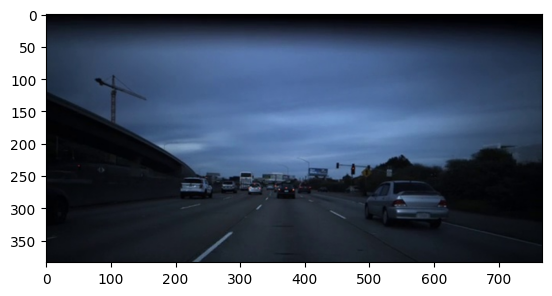

In [17]:
plt.imshow(
    ToPILImage()(loss_output["left_reconstructed"][0].type(results["first_image"].dtype) * 255)
)

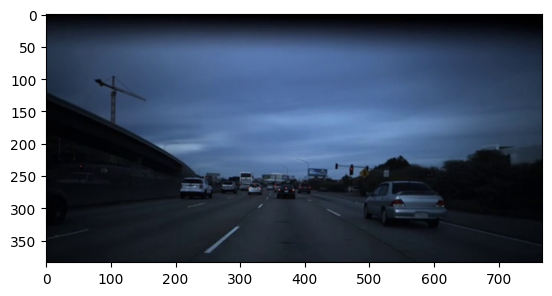

In [19]:
plt.imshow(
    ToPILImage()(loss_output["right_reconstructed"][0].type(results["first_image"].dtype) * 255)
)

### Disparity

In [12]:
(_, disparity_metadata) = model.forward(
    results["first_image"].reshape((1, ) + results["first_image"].shape).float(),
)

In [13]:
disparity_metadata["d_r"][0]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]], grad_fn=<SelectBackward0>)

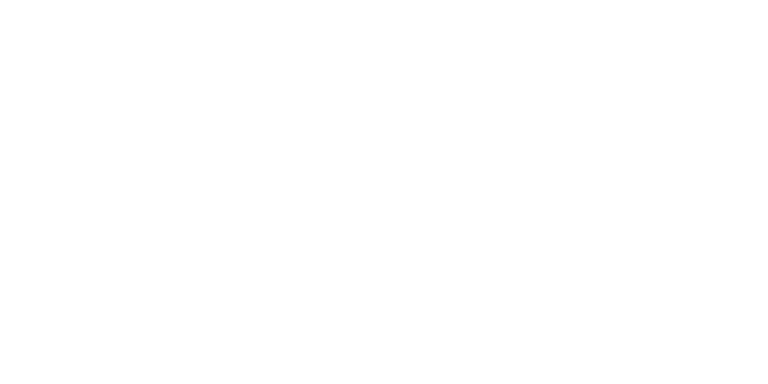

In [14]:
ToPILImage()(disparity_metadata["d_r"][0].type(results["first_image"].dtype))

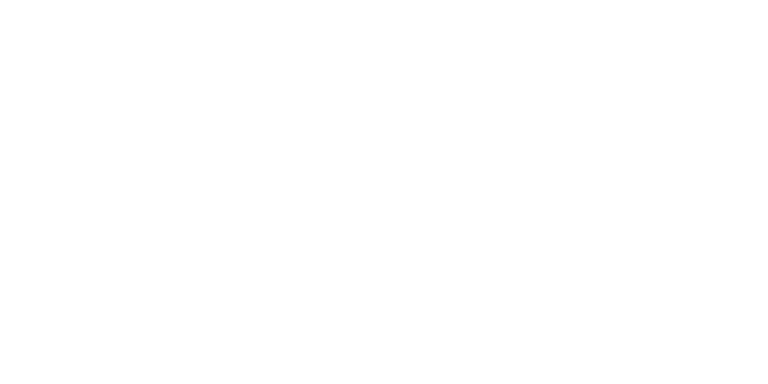

In [15]:
ToPILImage()(disparity_metadata["d_l"][0].type(results["first_image"].dtype))